<h1 style= "color:red; font-size:300%", align="center"> PARKINSON DISEASE <b style="color:blue">EDA</b> AND PREDICTION </h1>
<h2 style="color:black">BACKGROUND</h2> 
<b> The dataset used for this exploratory data analysis was obtained from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/">Uci ml Repository</a> </b> 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
              color:white;">
1. INTRODUCTION
</p>
</div>

<h3 style="font-family:verdana, size:5%">Pakinson's disease is a neurogenerative disease that affects the nerve cells in the basal ganglia of the brain, causing the cells in this area to become impaired or dead. These nerve cells produce an important neurotransmitter known as dopamine. When these neurons die or reduce, less dopamine is produced, which results in the irregular movement patterns linked to this disease.</h3>

    
<h4> 
    <b style="color:red">BACKGROUND:</b>

Early detection of Parkinson's disease has become difficult due to the slow onset of symptoms.With the neural network concept and deep learning, early predictions can be made using biomedical voice measurement.

The detection and diagnosis of PD at its early onset has become a problem in the medical field because of the slow progression of its symptoms. With the advent of technology, different diagnosing methods are being introduced and explored, one of which is through the concept of a neural network. This paper highlights the human voice of patients using a multilayer perceptron neural network (MLP) to accurately diagnose individuals who are diagnosed with PD. The MLP classification prediction was found to have an average accuracy of 91.5%.

The dataset was obtained from the UCI machine learning repository, and is composed of a range of biomedical voice measurements from 31 people, including 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of the 195 voice recordings from these individuals ("name" column). According to the status column, 0 represents individuals without PD, while 1 represents those with the disorder.</h4>

<h4 sytle="font-family:'Courier New'">The features of this dataset were constructed into;
    
<b style="color:blue">(1). MDVP:F(Hz) Multidimensional Voice Program fundamental frequency(Avearge, Mximunum, Minimum).</b>
* MDVP:F0 (Hz)	Average. 
* MDVP:Fhi (Hz)	Maximum. 
* MDVP:Flo (Hz)	Minimum.

<b style="color:blue">(2) Vocal acoustic parameters</b>
* MDVP:Jitter(%)	MDVP jitter in percentage.
* MDVP:Jitter(Abs)	MDVP absolute jitter in ms.
* Jitter:DDP	Average absolute difference of differences between jitter cycles.
* MDVP:Shimmer	MDVP local shimmer.
* MDVP:Shimmer(dB)	MDVP local shimmer in dB.


<b style="color:blue">(3)Perturbation magnitude</b>
* MDVP:RAP	MDVP relative amplitude perturbation.
* MDVP:PPQ	MDVP five-point period perturbation quotient.
* Shimmer:APQ3	Three-point amplitude perturbation quotient.
* Shimmer:APQ5	Five-point amplitude perturbation quotient.
* MDVP:APQ11	MDVP 11-point amplitude perturbation quotient.
* Shimmer:DDA	Average absolute differences between the amplitudes of consecutive periods.


<b style="color:blue">(4) Others</b>
* name - ASCII subject name and recording number.
* status - Health status of the subject (one) - Parkinson’s, (zero) - healthy.
* NHR	Noise-to-harmonics ratio.
* HNR	Harmonics-to-noise ratio.
* RPDE	Recurrence period density entropy measure.
* D2	Correlation dimension.
* DFA	Signal fractal scaling exponent of detrended fluctuation analysis.
* Spread1	Two nonlinear measures of fundamental.
* Spread2	Frequency variation.
* PPE	Pitch period entropy.</h4>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
MACHINE LEARNING MODELS
</p>
</div>

<h1 style="font-weight:heavy">The models used in this notebook include 
 &#8595</h1>
<h2> 

1.K-Nearest Neighbour (KNN),
    
    
    
    
2.Gaussian Naive Bayes,
    

3.Logistic Regression,
    

4.Support Vector Machine (SVM).</h2>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
IMPORT RELEVANT LIBRARIES
</p>
</div>

In [1]:
pip install simple_colors

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from simple_colors import *


In [3]:
df=pd.read_csv("/kaggle/input/parkinson-dataset/parkinsons.data")
df.head().style.background_gradient("Purples", axis=1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# simple_colors library is used here

#dataset info
print("*" * 40)
print(red(("\033[1m"+ "Dataset info ......"+ "\033[0m")))
print("Total Rows :", df.shape[0])
print("Total Columns :", df.shape[1])
print("*" * 40)
print("\n")

#Dataset details
print("*" * 40)
print(red("\033[1m" + "Details :"+ "\033[0m"))
print(df.info())
print("*" * 40)
print("\n")

#Null data
print("*" * 40)
print(red("\033[1m" + "Null Data Check :" + "\033[0m"))
print(df.isnull().sum())
print("*" * 40)
print("\n")

#Duplicated data check
print("*" * 40)
print(red("\033[1m" + "Duplicate Check :"))
print("There are ", df.duplicated().sum(), " duplicated data")
print("*" * 40)

****************************************
Dataset info ......
Total Rows : 195
Total Columns : 24
****************************************


****************************************
Details :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64

👉 The dataset has been successfully imported.

👉 In the dataset, there are 24 columns with 195 entries. Also, there are no null values in this dataset. The details of each variables also can be seen above. However, the data types for for dataset are not uniform.We will fix that below before performing our analysis. 

👉We do not have duplicate data

In [5]:
# numerical data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


👉 Aside from the MDVP(high(91), avearge(41), and low(43)), HNR(4.4), spread1(1.1) the remaining entries have low variation.

In [6]:
print(red("\033[1m" +"Check for the number of unique variables :"+ "\033[0m"))
col=df.columns
for i in col:
    print("The unique variables in", i, " column: are", df[i].nunique())

Check for the number of unique variables :
The unique variables in name  column: are 195
The unique variables in MDVP:Fo(Hz)  column: are 195
The unique variables in MDVP:Fhi(Hz)  column: are 195
The unique variables in MDVP:Flo(Hz)  column: are 195
The unique variables in MDVP:Jitter(%)  column: are 173
The unique variables in MDVP:Jitter(Abs)  column: are 19
The unique variables in MDVP:RAP  column: are 155
The unique variables in MDVP:PPQ  column: are 165
The unique variables in Jitter:DDP  column: are 180
The unique variables in MDVP:Shimmer  column: are 188
The unique variables in MDVP:Shimmer(dB)  column: are 149
The unique variables in Shimmer:APQ3  column: are 184
The unique variables in Shimmer:APQ5  column: are 189
The unique variables in MDVP:APQ  column: are 189
The unique variables in Shimmer:DDA  column: are 189
The unique variables in NHR  column: are 185
The unique variables in HNR  column: are 195
The unique variables in status  column: are 2
The unique variables in RP

👉 The that "status" column has two unique variables(categorical). And the other columns contain unique variables that are more than 10, so we can say they are  continous.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
EXPLORATORY DATA ANALYSIS
</p>
</div>

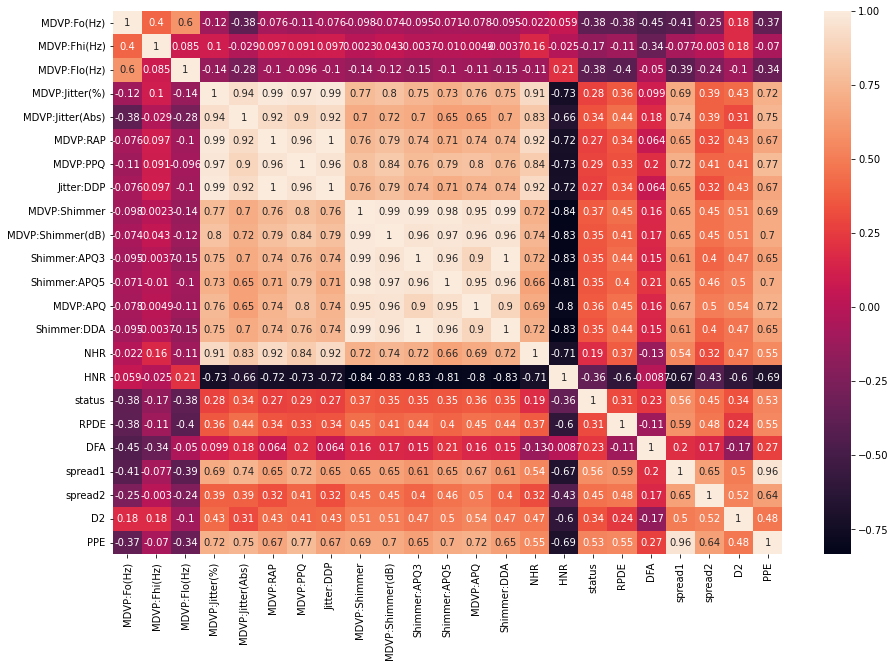

In [7]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

We can see that most of the data are positively corrrelated.

In [8]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

Create a pie chart to show the status distribution of people with parkinson and those without the disease

<AxesSubplot:title={'center':'Histogram'}, xlabel='Status', ylabel='Total'>

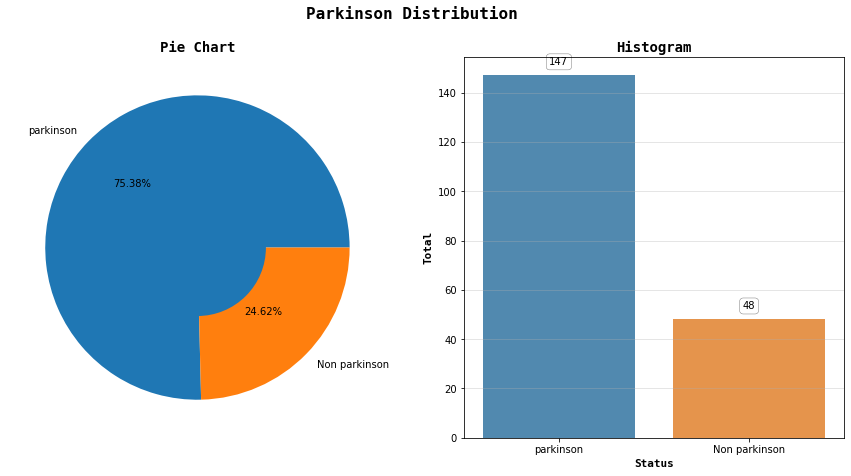

In [9]:

# Size for Both Figures 
plt.figure(figsize=(15, 7))
plt.suptitle('Parkinson Distribution', fontweight='bold', 
             fontsize='16', fontfamily='monospace')

# Setting Labels and Order 
labels=['parkinson', 'Non parkinson']
order=df['status'].value_counts().index


#  Pie Chart 
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='monospace')
plt.pie(df['status'].value_counts(), labels=labels, autopct='%.2f%%')
centre=plt.Circle((0, 0), 0.45)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='monospace')
ax = sns.countplot(x='status', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Status', fontweight='bold', fontsize=11, fontfamily='monospace')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='monospace')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


In [10]:
MDVP_Frequency=df.iloc[:,1:4]
MDVP_Frequency

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz)
0,119.992,157.302,74.997
1,122.400,148.650,113.819
2,116.682,131.111,111.555
3,116.676,137.871,111.366
4,116.014,141.781,110.655
...,...,...,...
190,174.188,230.978,94.261
191,209.516,253.017,89.488
192,174.688,240.005,74.287
193,198.764,396.961,74.904


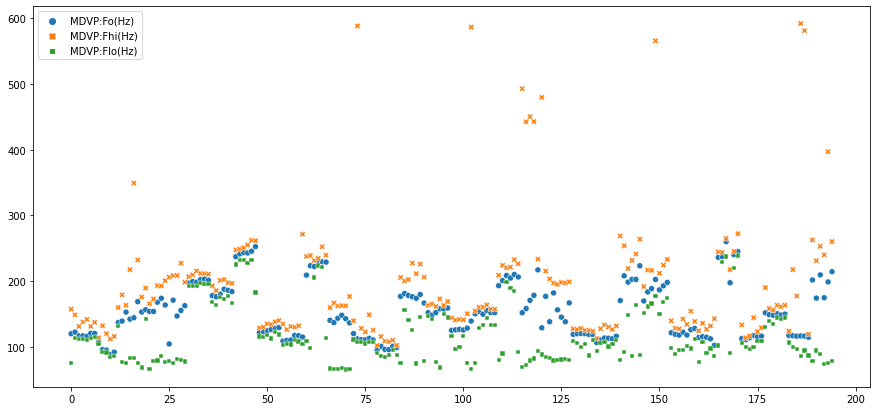

In [11]:
# let us see if the MDVP(frequency) recordings are correspond 
# to their names maximum, avearage, and low
plt.figure(figsize=(15,7))
sns.scatterplot(data=MDVP_Frequency);

The above is confirmed.

In [12]:
df=df.drop("name", axis=1)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [13]:
Cols=df.loc[:, df.columns != "status"]
Cols

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Reorder the "status" column which is an int to the last position of the dataframe to avoid (value error: Unknown label type: 'continuous')

In [14]:
col=df.columns
col

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
col=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE','status']
col

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']

In [16]:
#Reorder the "status" column
df = df.reindex(columns=col)

In [17]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
EXPLORE FOR THE DISTRIBUTIONS FOR PARKINSON ENTRIES
</p>
</div>

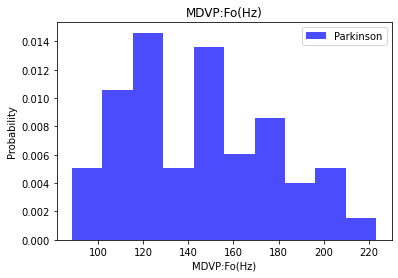

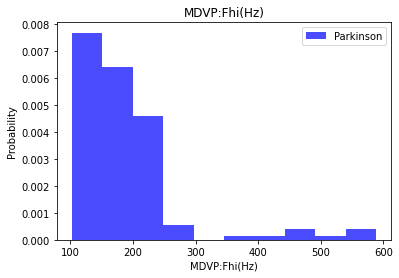

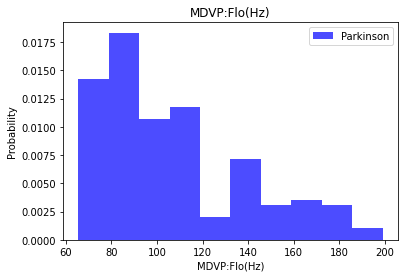

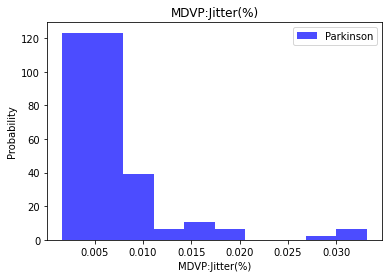

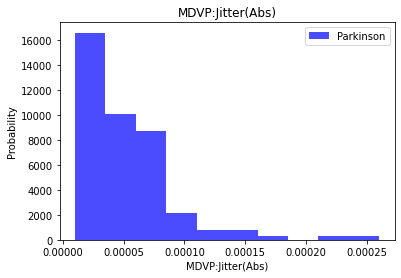

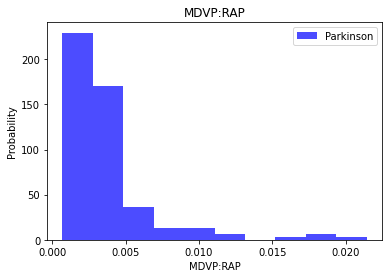

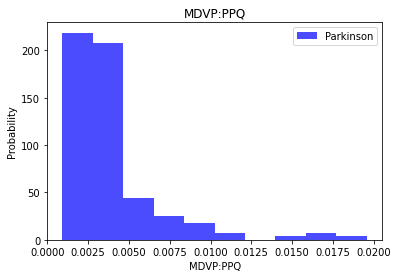

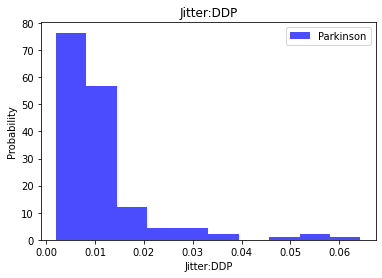

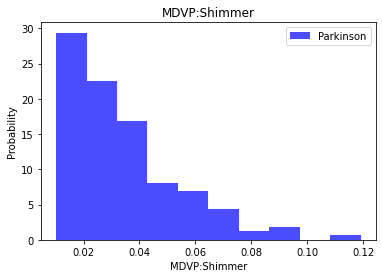

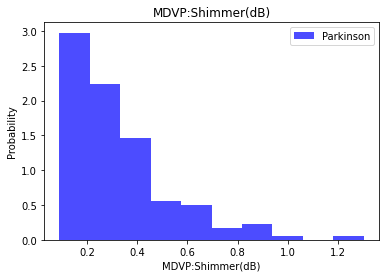

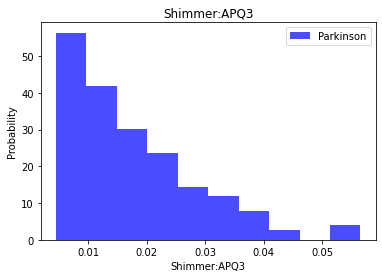

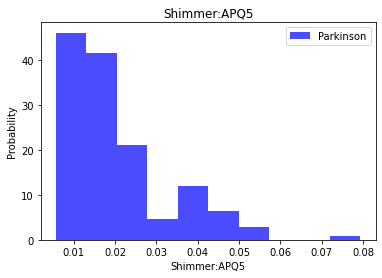

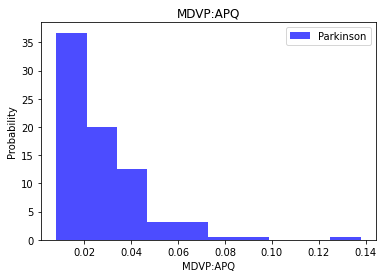

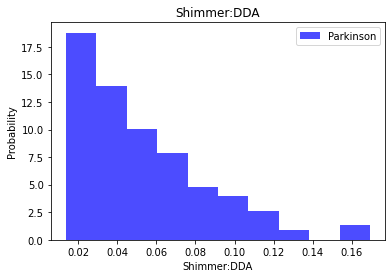

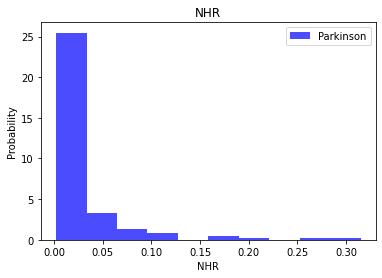

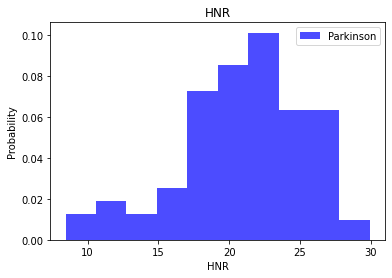

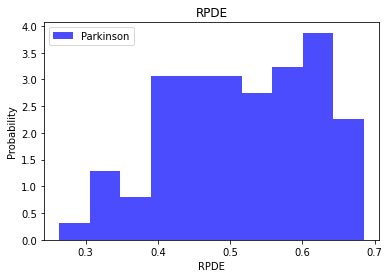

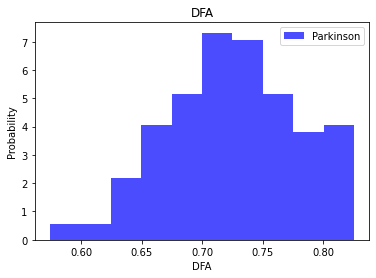

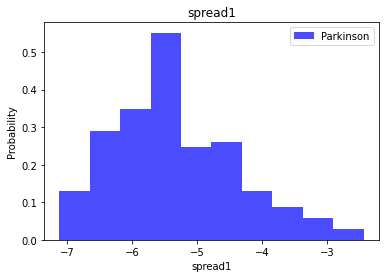

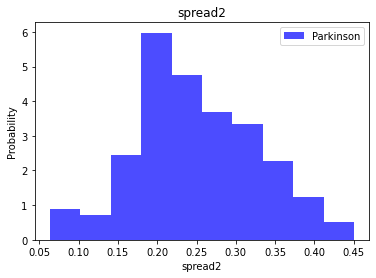

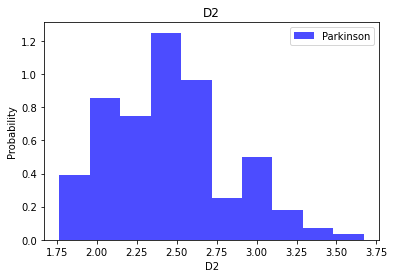

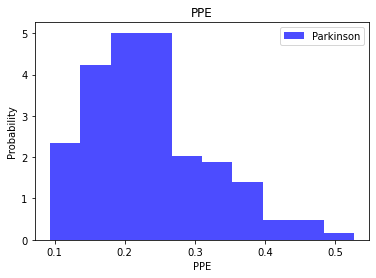

In [18]:

for label in col[:-1]:
    plt.hist(df[df["status"]==1][label], color="blue", label='Parkinson',alpha=0.7, density=True) 
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
  




<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
EXPLORE FOR THE DISTRIBUTIONS FOR NON PARKINSON ENTRIES
</p>
</div>

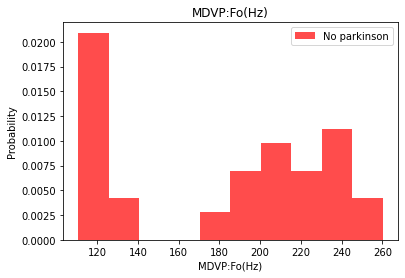

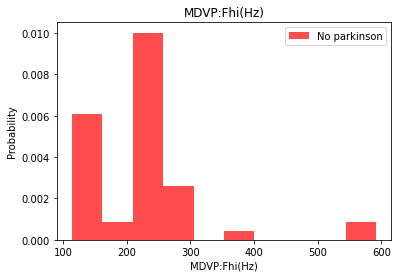

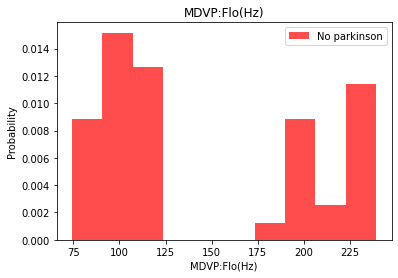

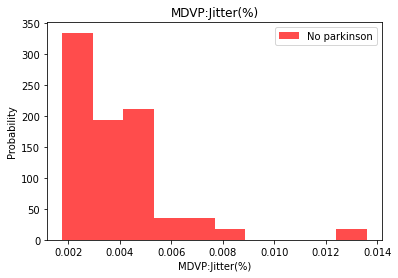

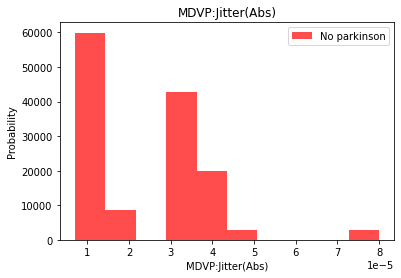

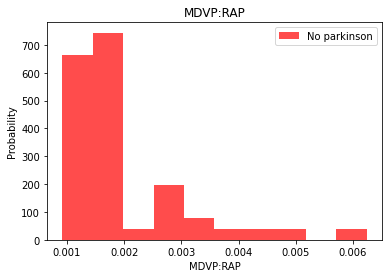

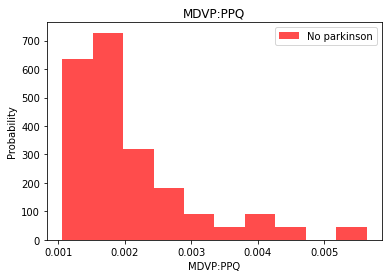

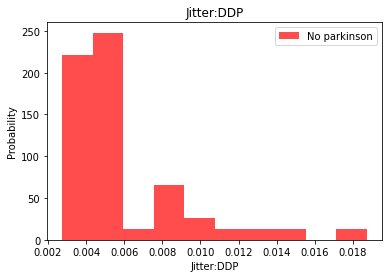

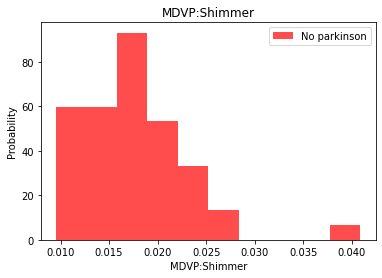

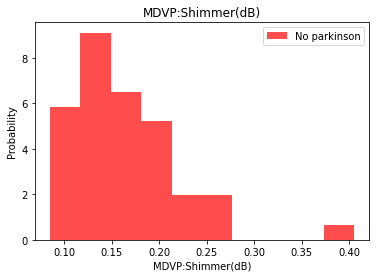

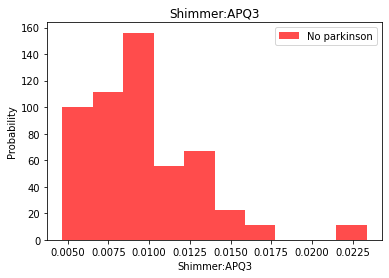

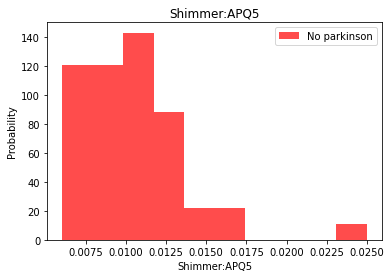

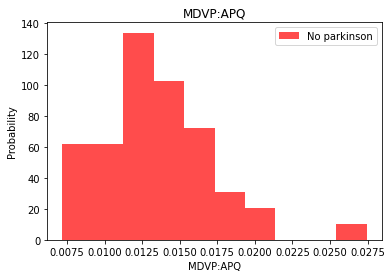

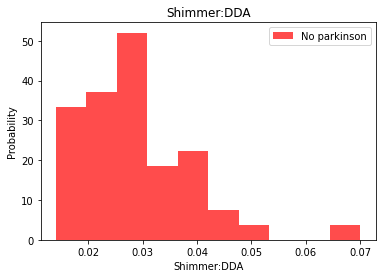

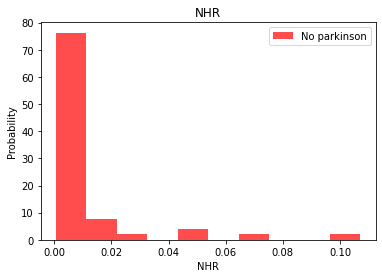

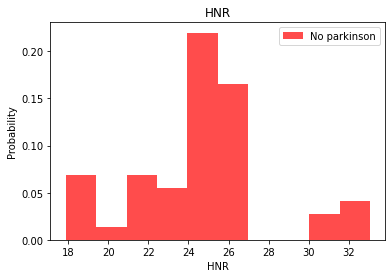

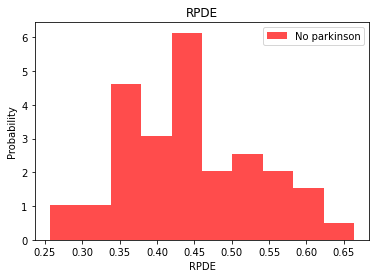

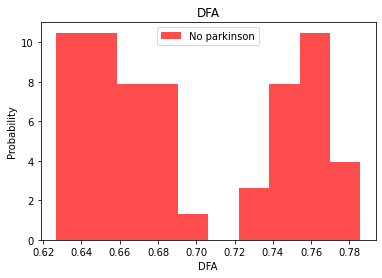

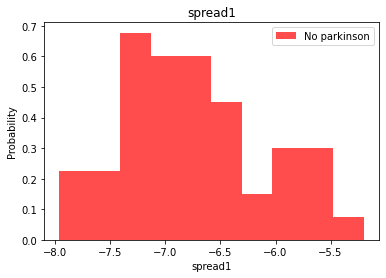

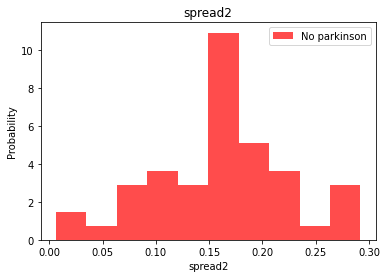

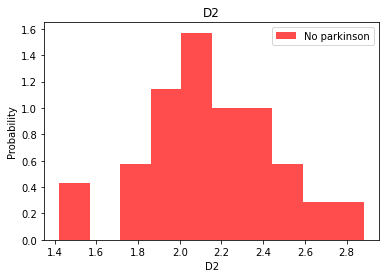

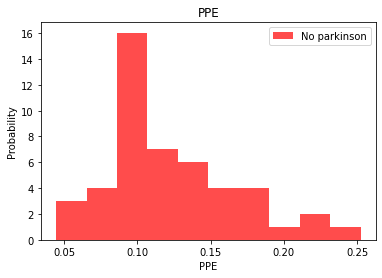

In [19]:
for label in col[:-1]:
    plt.hist(df[df["status"]==0][label], color='red', label='No parkinson', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

The features have outliers that may affect our modeling, So will we need to scale our dataset during data preprocessing.

Train, validation, test datasets

0-60%=train

60-80%=validation

80%-100%=test


In [20]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    CREATE SCALE_DATASET FUNCTION
</p>
</div>

In [21]:
print(len(train[train["status"]==1]))
print(len(train[train["status"]==0]))
            

89
28


👉 Those with parkinson is more than 200% greater than those without the disease. There is need to use random sampler to avoid bias. This is achieved using the imblearn.over_sampling module.

In [22]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [23]:
np.seterr(divide='ignore', invalid='ignore');

In [24]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(178, 22)
(39, 22)
(178,)
(39,)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    KNN
</p>
</div>

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))
KNN=(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Naive Bayes
</p>
</div>

In [28]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
NB=nb_model.fit(x_train, y_train)

In [29]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))
NB=(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.95      0.69      0.80        29

    accuracy                           0.74        39
   macro avg       0.73      0.79      0.72        39
weighted avg       0.84      0.74      0.76        39



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
   Log Regression
</p>
</div>

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)
lg_model.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))
LG=(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.83      0.83      0.83        29

    accuracy                           0.74        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.74      0.74      0.74        39



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#8B0000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    SVM
</p>
</div>

In [32]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [33]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))
SVM=(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.89      0.86      0.88        29

    accuracy                           0.82        39
   macro avg       0.76      0.78      0.77        39
weighted avg       0.83      0.82      0.82        39



In [34]:
print("*" * 40)
print(red("KNN Report :"))
print(KNN)
print("*" * 40)
print("\n")
print("*" * 40)
print(red("NB Report :"))
print(NB)
print("*" * 40)
print("\n")
print("*" * 40)
print(red("LG Report :"))
print(LG)
print("*" * 40)
print("\n")
print("*" * 40)
print(red("SVM Report :"))
print(SVM)
print("*" * 40)
print("\n")





****************************************
KNN Report :
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39

****************************************


****************************************
NB Report :
              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.95      0.69      0.80        29

    accuracy                           0.74        39
   macro avg       0.73      0.79      0.72        39
weighted avg       0.84      0.74      0.76        39

****************************************


****************************************
LG Report :
              precision    recall  f1-score   support

           0       0.50      0.50      0.50  

CONCLUSION:
SVM is the best model for this prediction.